## Load Wine Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [10]:
wine = datasets.load_wine(as_frame=True)
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [11]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()

alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0    14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1    13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2    13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3    14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4    13.24        2.59  2.87  ...  1.04                          2.93    735.0

[5 rows x 13 columns]

In [12]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

## Data Visualization

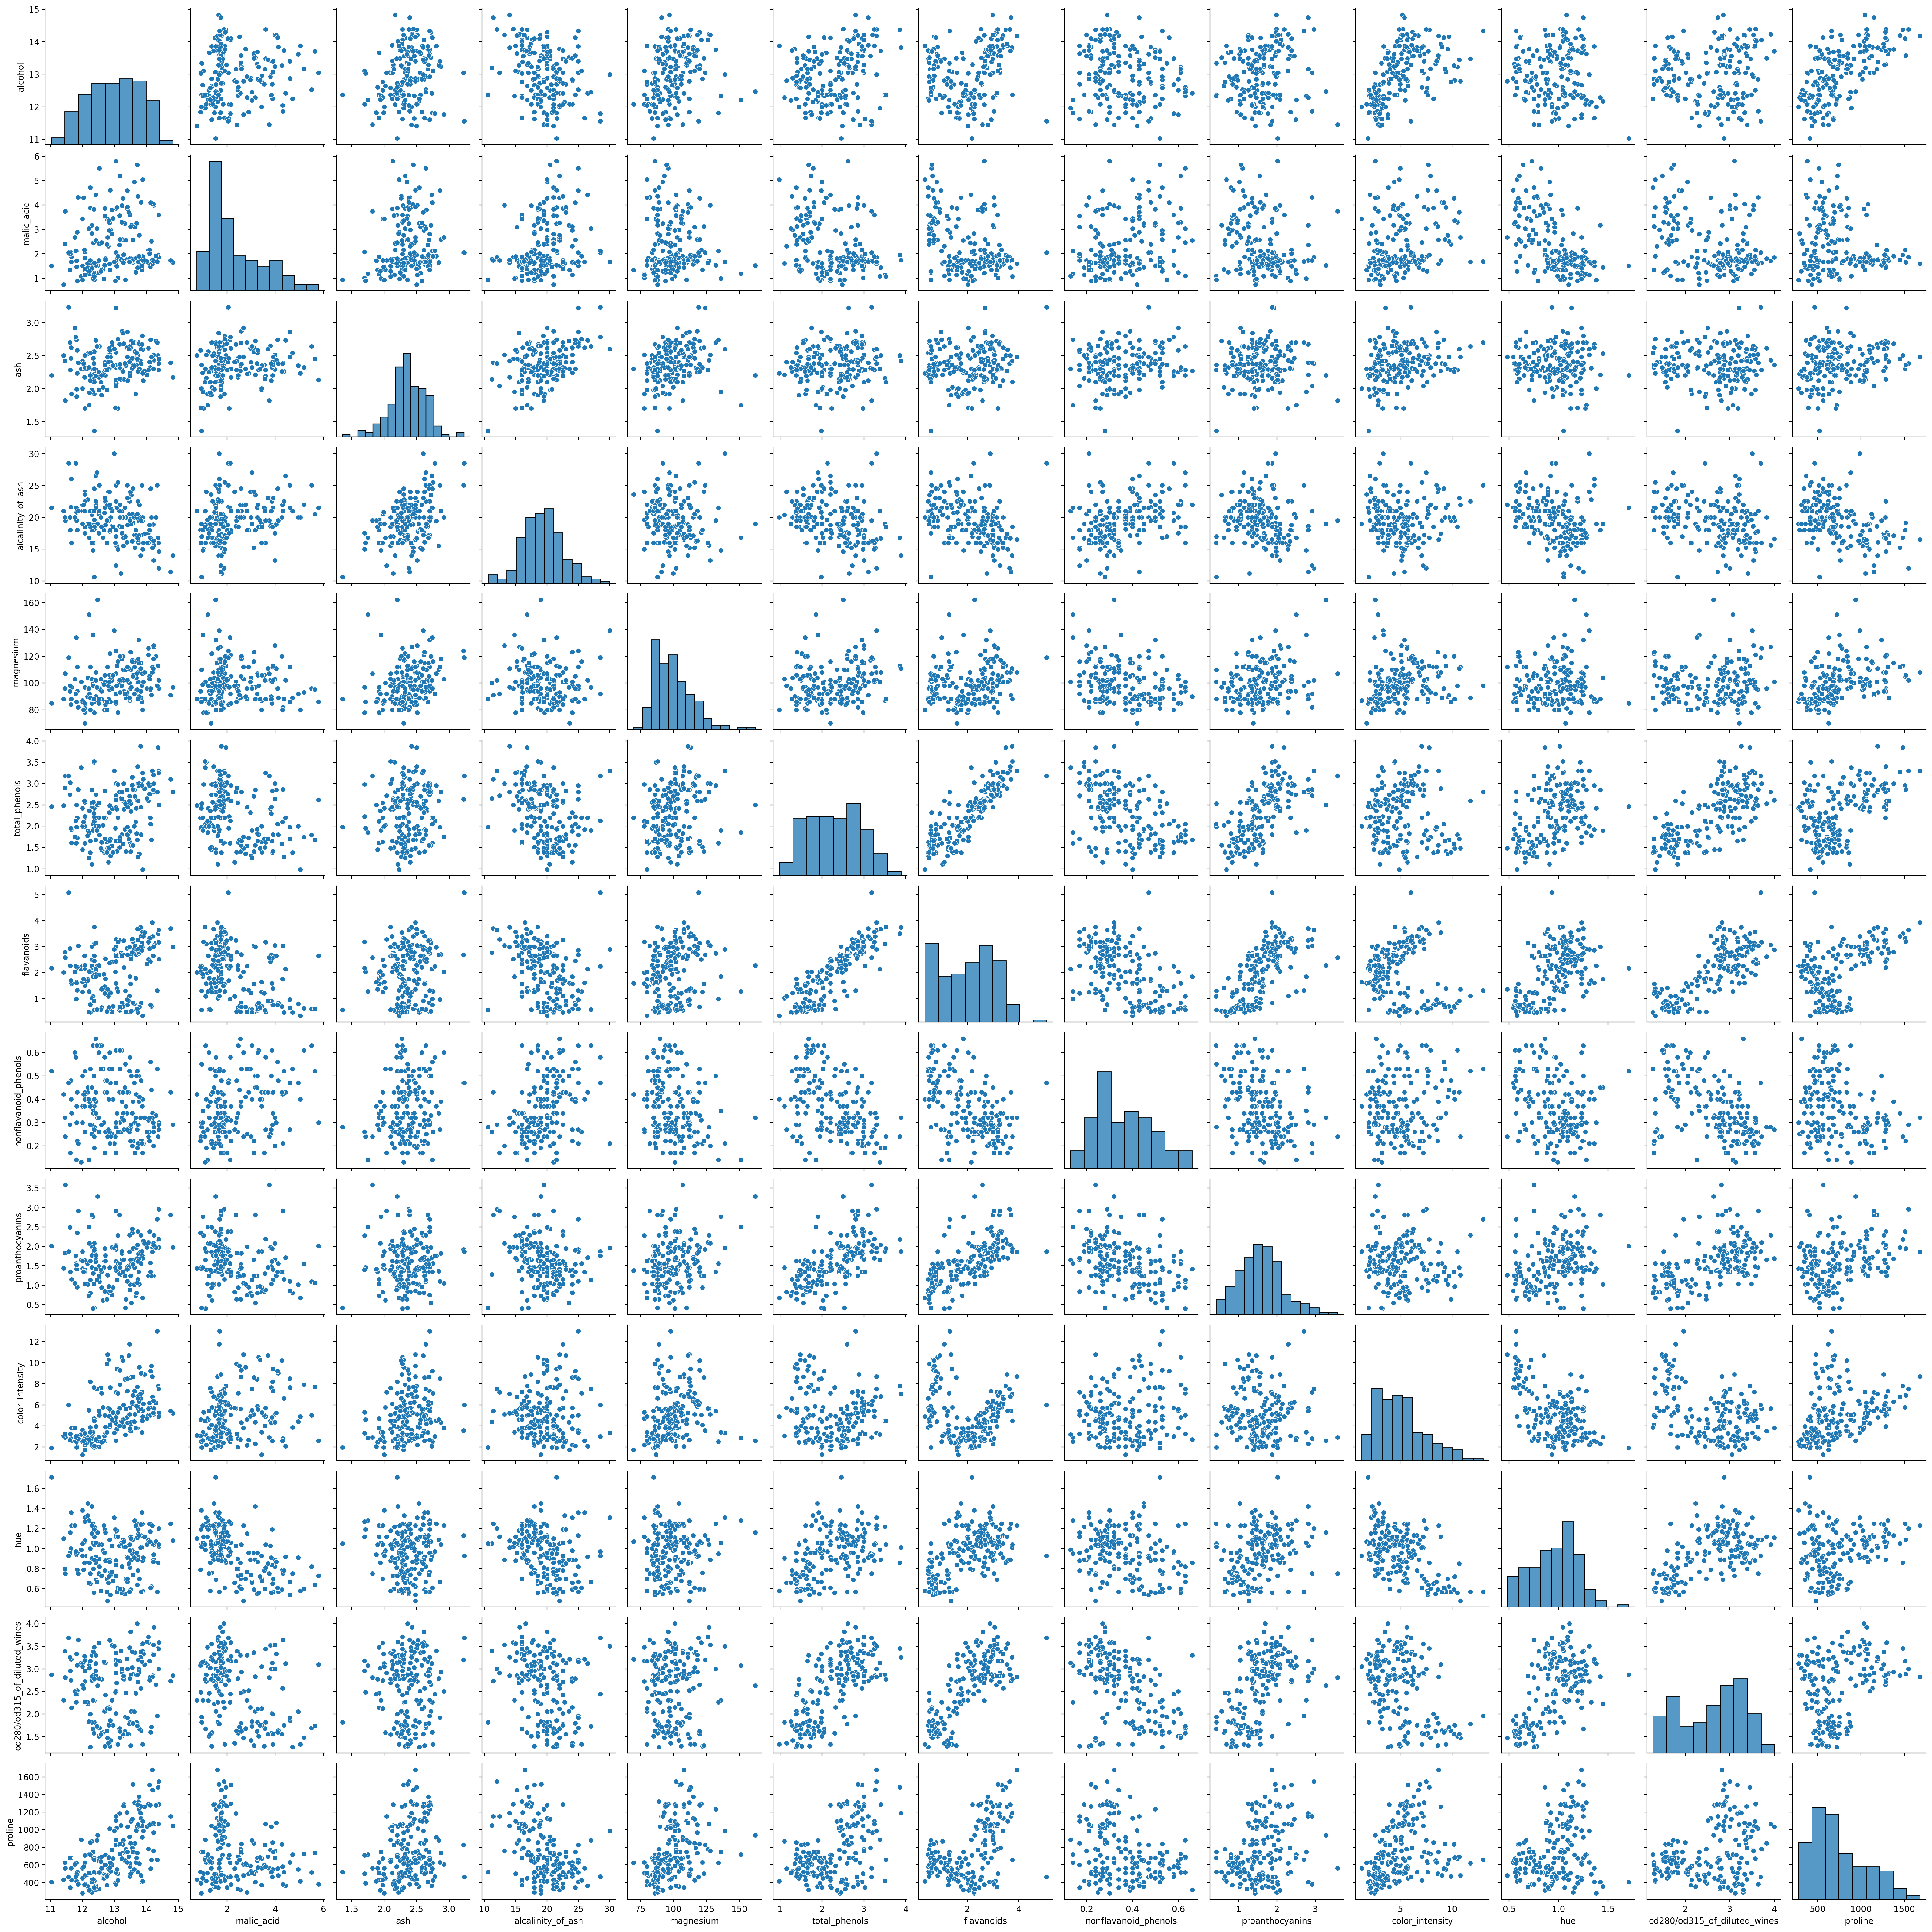

In [13]:
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 200

sns.pairplot(df)

In [14]:
df['target'] = wine.target
df.head()

alcohol  malic_acid   ash  ...  od280/od315_of_diluted_wines  proline  target
0    14.23        1.71  2.43  ...                          3.92   1065.0       0
1    13.20        1.78  2.14  ...                          3.40   1050.0       0
2    13.16        2.36  2.67  ...                          3.17   1185.0       0
3    14.37        1.95  2.50  ...                          3.45   1480.0       0
4    13.24        2.59  2.87  ...                          2.93    735.0       0

[5 rows x 14 columns]

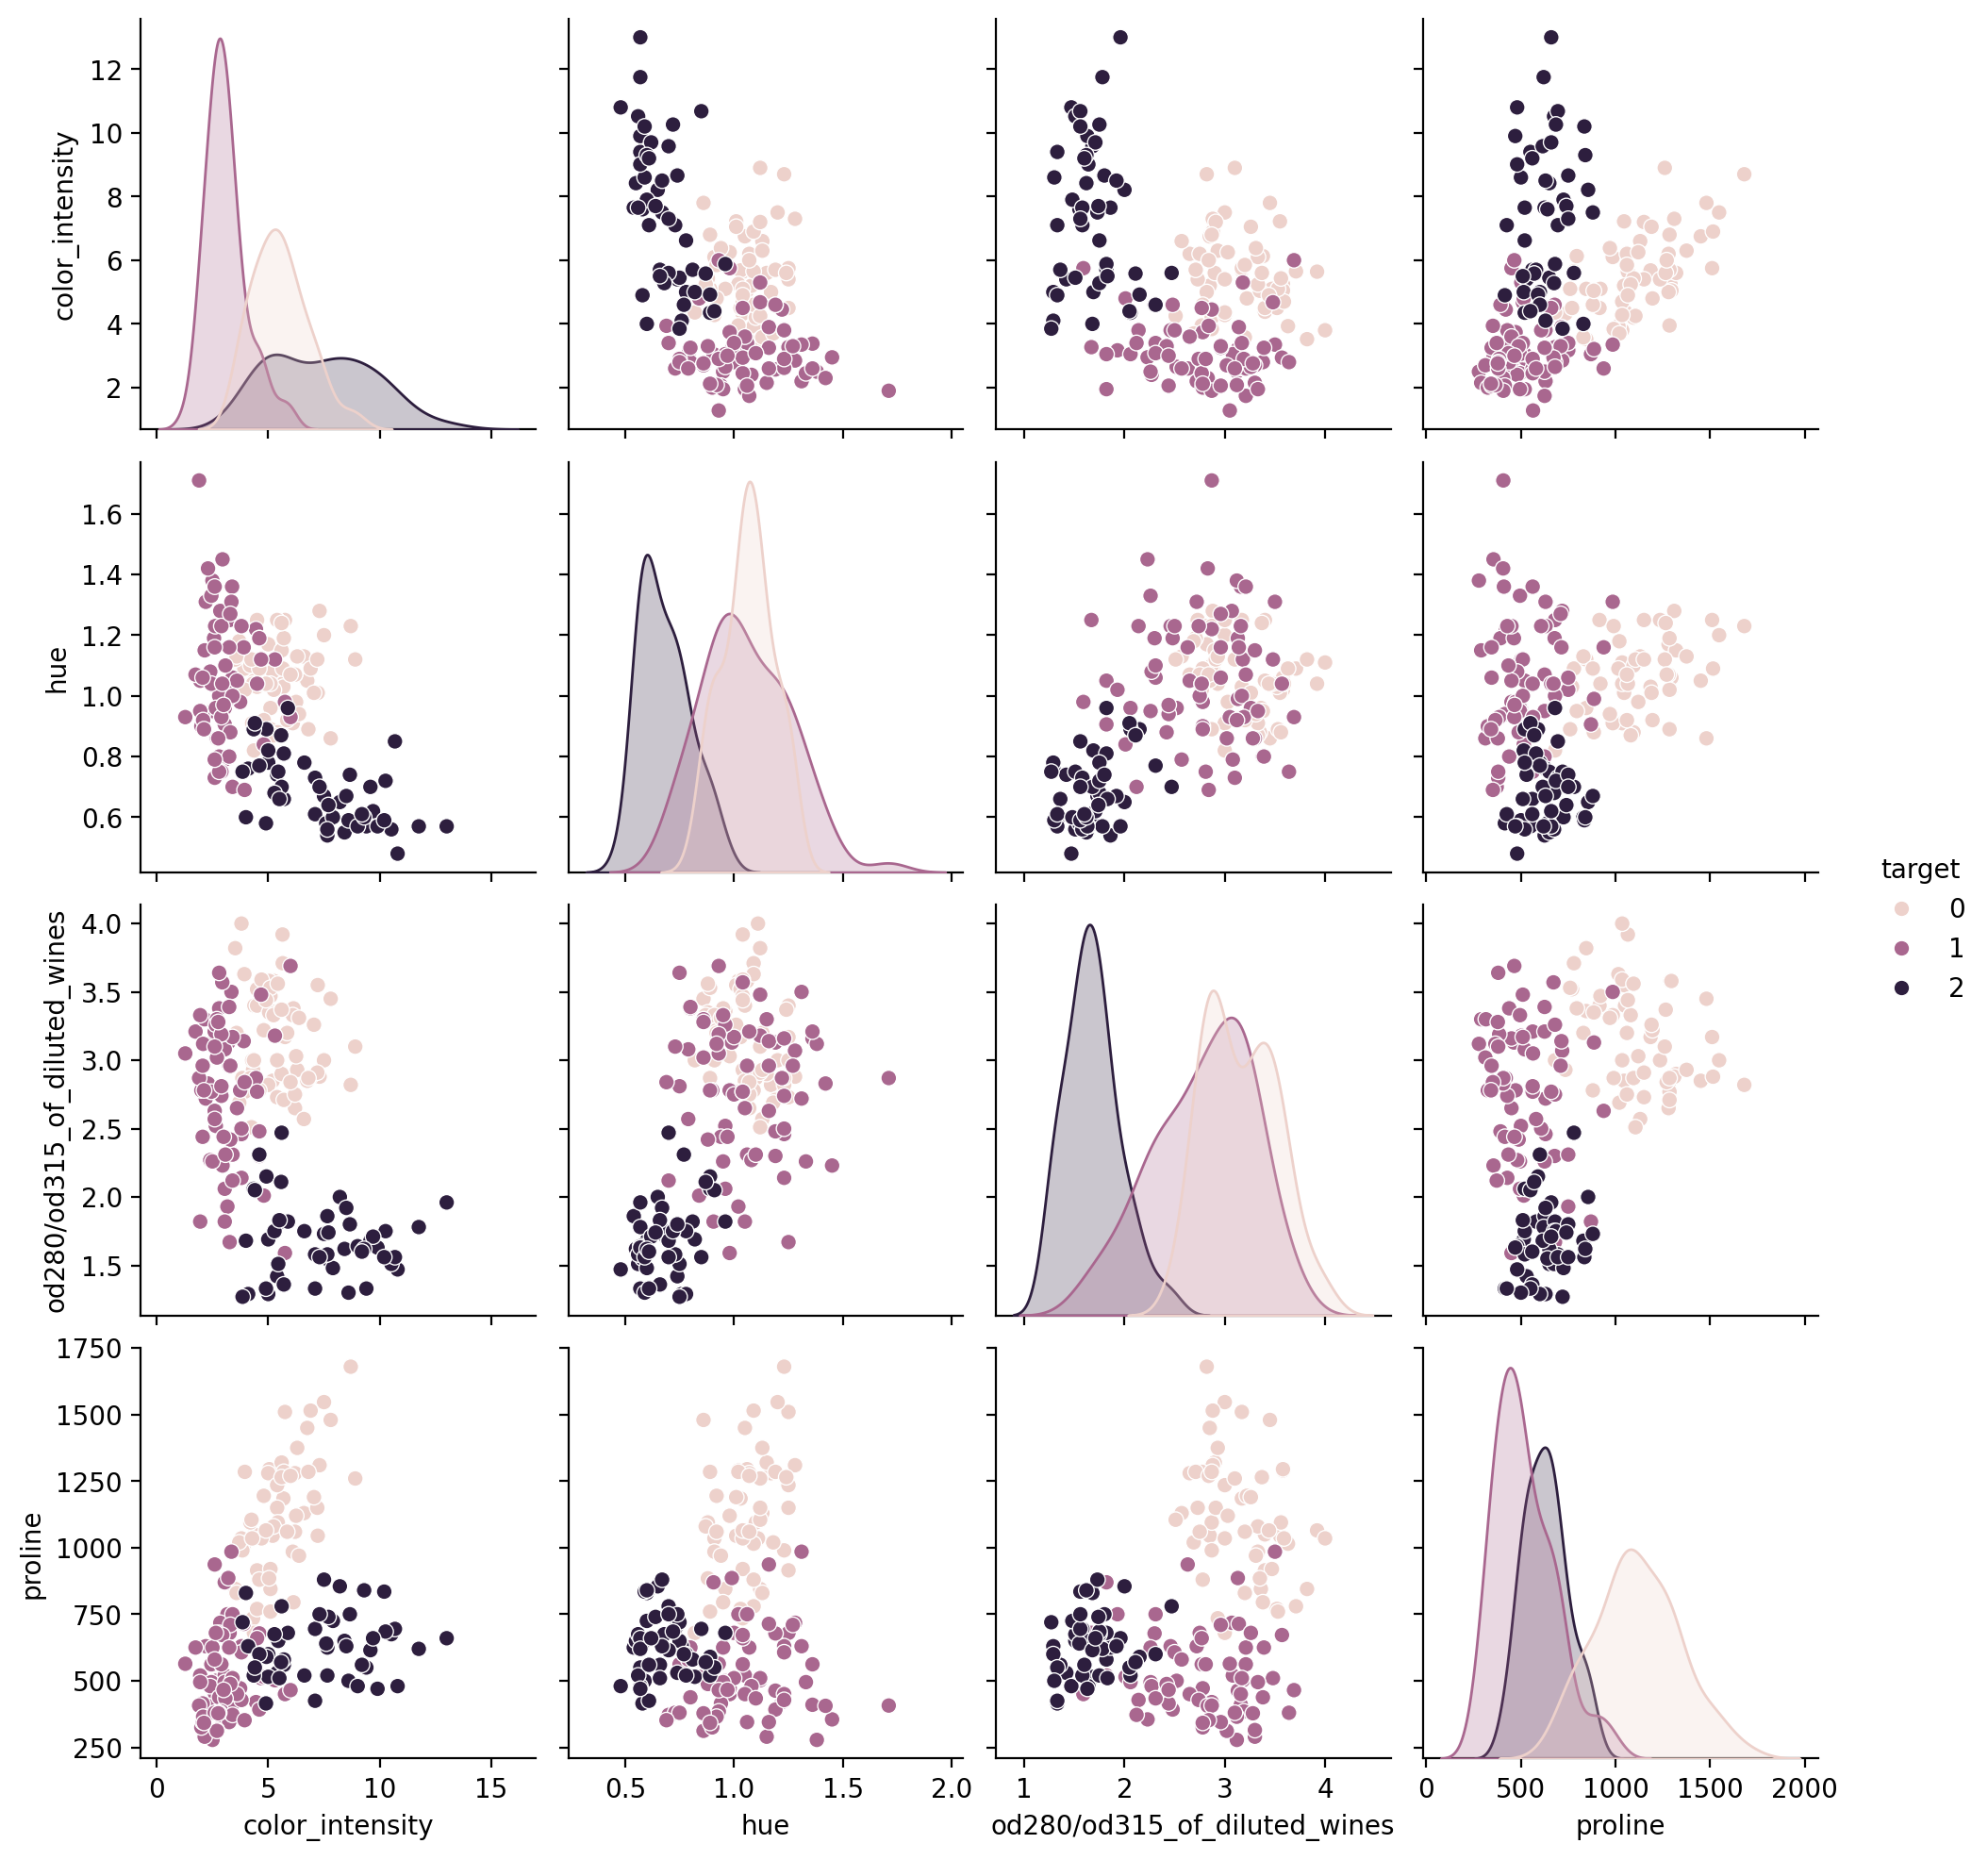

In [15]:
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 200
sns.pairplot(df.iloc[:, -5:], hue='target')

## Splitting The Dataset

In [16]:
X = wine.data
y = wine.target

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape, X_test.shape

((142, 13), (36, 13))

In [19]:
X_train.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [20]:
X_train.describe()

alcohol  malic_acid  ...  od280/od315_of_diluted_wines      proline
count  142.000000  142.000000  ...                    142.000000   142.000000
mean    12.979085    2.373521  ...                      2.592817   734.894366
std      0.820116    1.143934  ...                      0.722141   302.323595
min     11.030000    0.890000  ...                      1.270000   278.000000
25%     12.332500    1.615000  ...                      1.837500   502.500000
50%     13.010000    1.875000  ...                      2.775000   660.000000
75%     13.677500    3.135000  ...                      3.170000   932.750000
max     14.830000    5.800000  ...                      4.000000  1547.000000

[8 rows x 13 columns]

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:

pd.DataFrame(X_train).describe()

0             1   ...            11            12
count  1.420000e+02  1.420000e+02  ...  1.420000e+02  1.420000e+02
mean  -3.440128e-16  1.938981e-16  ...  2.064077e-16 -2.189172e-17
std    1.003540e+00  1.003540e+00  ...  1.003540e+00  1.003540e+00
min   -2.385009e+00 -1.301450e+00  ... -1.838284e+00 -1.516626e+00
25%   -7.911972e-01 -6.654285e-01  ... -1.049644e+00 -7.714152e-01
50%    3.782994e-02 -4.373381e-01  ...  2.531751e-01 -2.486061e-01
75%    8.546205e-01  6.680232e-01  ...  8.020962e-01  6.567665e-01
max    2.264884e+00  3.005950e+00  ...  1.955525e+00  2.695722e+00

[8 rows x 13 columns]